# Certificate in Data Science | Assignment 9 |  
> University of Washington, Seattle, WA    
> January 2020  
> N. Hicks

## Dataset Description  
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

## Assignment Instructions  
Using the CIFAR-10 dataset, create a new notebook to build a TensorFlow model. Perform each of the following tasks and answer the related questions:
- Read CIFAR-10 dataset from Keras.
- Explore data
- Preprocess and prepare data for classification
- Build a TensorFlow model using a single dense hidden layer
- Apply model to test set and evaluate accuracy
- Perform 3 adjusts to the number of layers and activation functions to improve accuracy
- Summarize your findings regarding the different iterations and any insights gained

## Establish the Dataset

### Import Libraries

In [1]:
from keras.datasets import cifar10
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### Import the Data

In [2]:
# import, then train-split the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Functions for Scripting

In [3]:
'''
Report the Numpy n-dimensional array characteristics.
RETURN: None; print the characteristics.
'''
def print_array_attrs(arr, txt):
    print('--------------------------')
    print('DATASET                 {}'.format(txt))
    print('dType                   {}'.format(arr.dtype))      # the array data type
    print('num_dimensions          {}'.format(arr.ndim))       # numbr of dimensions
    print('shape                   {}'.format(arr.shape))      # the array shape
    print('stride                  {}'.format(arr.strides))    # the stride of the array
    print('total num_elements      {}\n'.format(arr.size))       # number of elements
    print('memory address          {}'.format(arr.data))       # the memory address
    print('element length, bytes   {}'.format(arr.itemsize))   # length of one array element, in bytes
    print('elements size, bytes    {}'.format(arr.nbytes))     # total bytes consumed of the elements
    print('memory layout\n{}'.format(arr.flags))      # memory layout

### Explore the Data

In [4]:
# return the memory address of each array
arrays = [x_train, y_train, x_test, y_test]
labels = ['x_train', 'y_train', 'x_test', 'y_test']
for (arr, txt) in zip(arrays, labels):
    print_array_attrs(arr, txt)

--------------------------
DATASET                 x_train
dType                   uint8
num_dimensions          4
shape                   (50000, 32, 32, 3)
stride                  (3072, 32, 1, 1024)
total num_elements      153600000

memory address          <memory at 0x000000001220DE18>
element length, bytes   1
elements size, bytes    153600000
memory layout
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

--------------------------
DATASET                 y_train
dType                   uint8
num_dimensions          2
shape                   (50000, 1)
stride                  (1, 1)
total num_elements      50000

memory address          <memory at 0x000000001224A588>
element length, bytes   1
elements size, bytes    50000
memory layout
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


### Preprocess / Prepare the Data

In [5]:
# set the seaborn default color pallete
sns.set()

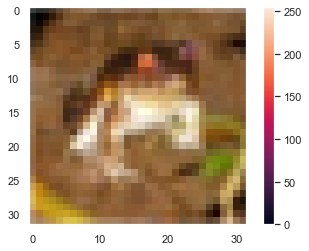

In [6]:
# plot the first array element of data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# scale the data according to the image size in pixels (per the color scale)
x_train, x_test = x_train / 255.0, x_test / 255.0

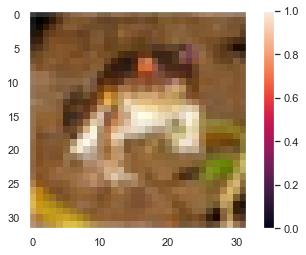

In [8]:
# plot the first array element of data
# validate the scale operation is as req'd: (0, 1)
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

C:\Users\NateDogg\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


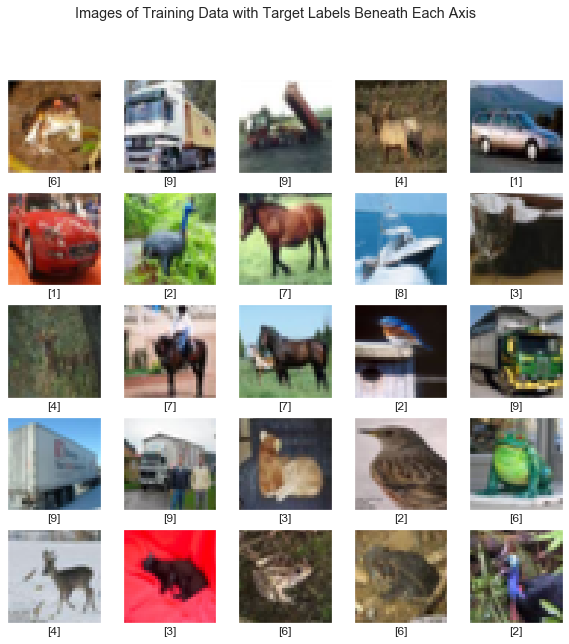

In [9]:
# show the images as given in the training data
# also show the associated classification (feature label)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.suptitle('Images of Training Data with Target Labels Beneath Each Axis')
plt.show()

## Build a TensorFlow Model

In [10]:
# build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # the input array
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # the output layer
])

In [11]:
# compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# train/fit the model
model.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.8942 - accuracy: 0.3176
Epoch 2/5
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.7566 - accuracy: 0.3718
Epoch 3/5
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.7181 - accuracy: 0.3879
Epoch 4/5
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.6851 - accuracy: 0.3996
Epoch 5/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.6630 - accuracy: 0.4087


### Evaluate the Model

In [13]:
# evaluate the results
test_loss, test_acc = model.evaluate(x_test, y_test)
# return the predicted model accuracy
print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.4133


### Tune the Model

#### Activation Functions

In [14]:
# build the models
model_sigmoid = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_leakyRELU = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation=tf.nn.leaky_relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_ELU = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation=tf.nn.elu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
# compile the models
model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

model_leakyRELU.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_ELU.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [16]:
# train/fit the models
model_sigmoid.fit(x_train, y_train, epochs=5)
print('\n')
model_leakyRELU.fit(x_train, y_train, epochs=5)
print('\n')
model_ELU.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.8808 - accuracy: 0.3271
Epoch 2/5
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.7468 - accuracy: 0.3800
Epoch 3/5
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.6933 - accuracy: 0.3954
Epoch 4/5
50000/50000 [==============================] - 92s 2ms/sample - loss: 1.6558 - accuracy: 0.4098
Epoch 5/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.6288 - accuracy: 0.4200


Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.9475 - accuracy: 0.3150
Epoch 2/5
50000/50000 [==============================] - 110s 2ms/sample - loss: 1.7967 - accuracy: 0.3691
Epoch 3/5
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.7069 - accuracy: 0.3932
Epoch 4/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.6505 - accuracy: 

In [17]:
# evaluate the results
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(x_test, y_test)
test_loss_leakyRELU, test_acc_leakyRELU = model_leakyRELU.evaluate(x_test, y_test)
test_loss_ELU, test_acc_ELU = model_ELU.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_sigmoid)

Test accuracy: 0.4033


In [19]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_leakyRELU)

Test accuracy: 0.4376


In [20]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_ELU)

Test accuracy: 0.4104


#### Hidden Layers

In [21]:
# build the models
model_l2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # the input array
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # the output layer
])

model_l3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # the input array
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # the output layer
])

model_l4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # the input array
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(128, activation=tf.nn.relu),  # the hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # the output layer
])

In [22]:
# compile the models
model_l2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model_l3.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

model_l4.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [23]:
# train/fit the models
model_l2.fit(x_train, y_train, epochs=5)
print('\n')
model_l3.fit(x_train, y_train, epochs=5)
print('\n')
model_l4.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.8671 - accuracy: 0.3271
Epoch 2/5
50000/50000 [==============================] - 116s 2ms/sample - loss: 1.6937 - accuracy: 0.3924
Epoch 3/5
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.6083 - accuracy: 0.4221
Epoch 4/5
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.5595 - accuracy: 0.4402
Epoch 5/5
50000/50000 [==============================] - 141s 3ms/sample - loss: 1.5267 - accuracy: 0.4524


Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 150s 3ms/sample - loss: 1.8650 - accuracy: 0.3234
Epoch 2/5
50000/50000 [==============================] - 156s 3ms/sample - loss: 1.6881 - accuracy: 0.3944
Epoch 3/5
50000/50000 [==============================] - 146s 3ms/sample - loss: 1.6079 - accuracy: 0.4239
Epoch 4/5
50000/50000 [==============================] - 138s 3ms/sample - loss: 1.5547 - accuracy:

In [24]:
# evaluate the results
test_loss_l2, test_acc_l2 = model_l2.evaluate(x_test, y_test)
test_loss_leaky_l3, test_acc_l3 = model_l3.evaluate(x_test, y_test)
test_loss_l4, test_acc_l4 = model_l4.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_l2)

Test accuracy: 0.4625


In [26]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_l3)

Test accuracy: 0.4434


In [27]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_l4)

Test accuracy: 0.4467


#### Tuned Model

In [28]:
# build the model
kernel = tf.nn.leaky_relu
model_tuned = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # the input array
    keras.layers.Dense(128, activation=kernel),  # the hidden layer
    keras.layers.Dense(128, activation=kernel),  # the hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # the output layer
])

In [29]:
# compile the model
model_tuned.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
# train/fit the model
model_tuned.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 105s 2ms/sample - loss: 1.8925 - accuracy: 0.3198
Epoch 2/5
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.7077 - accuracy: 0.3893
Epoch 3/5
50000/50000 [==============================] - 131s 3ms/sample - loss: 1.6292 - accuracy: 0.4161
Epoch 4/5
50000/50000 [==============================] - 121s 2ms/sample - loss: 1.5697 - accuracy: 0.4418
Epoch 5/5
50000/50000 [==============================] - 122s 2ms/sample - loss: 1.5292 - accuracy: 0.4545


In [30]:
# evaluate the results
test_loss_tuned, test_acc_tuned = model_tuned.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
# return the predicted model accuracy
print('Test accuracy:', test_acc_tuned)

Test accuracy: 0.4321


## Results

The CNN was tuned in the following ways:  

***ACTIVATION FUNCTION***
    - sigmoid
    - leaky_relu
    - elu

***NUMBER of HIDDEN LAYERS***
    - 2 layers
    - 3 layers
    - 4 layers

The accuracy for the various activation functions upon the CNN models are:
    - sigmoid             40.33%
    - leaky_relu          43.76%
    - elu                 41.04%
    - relu                41.33%

The accuracy for the various number of hidden layers, using a RELU kernel, within the CNN models are:
    - 1 hidden layer      41.33%
    - 2 hidden layers     46.25%
    - 3 hidden layers     44.34%
    - 4 hidden layers     44.67%


The tuned CNN model had the following settings and accuracy:
    - activation function   leaky_relu
    - hidden layers         2
    - accuracy              43.21%

The accuracy improvement of the tuned model is therefore `1.88%`. Observe that the tuned model appears to have a good fit, because it is less than the accuracy of the best performing kernel.


NOTE: It was an interesting discovery that Internet Explorer performed better (faster training times) on CNN training, than it did with the same process using the Chrome browser.